In [99]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [100]:
df = pd.read_csv('/content/wine.csv') # Loading Dataset

In [101]:
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [102]:
## EDA

df.head()  #Displays the first 5 rows of the dataset

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [103]:
df.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [104]:
# Check data types and missing values
df.info()      # In this dataset: No missing values, all numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [105]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [106]:
df## Summary statistics

df.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

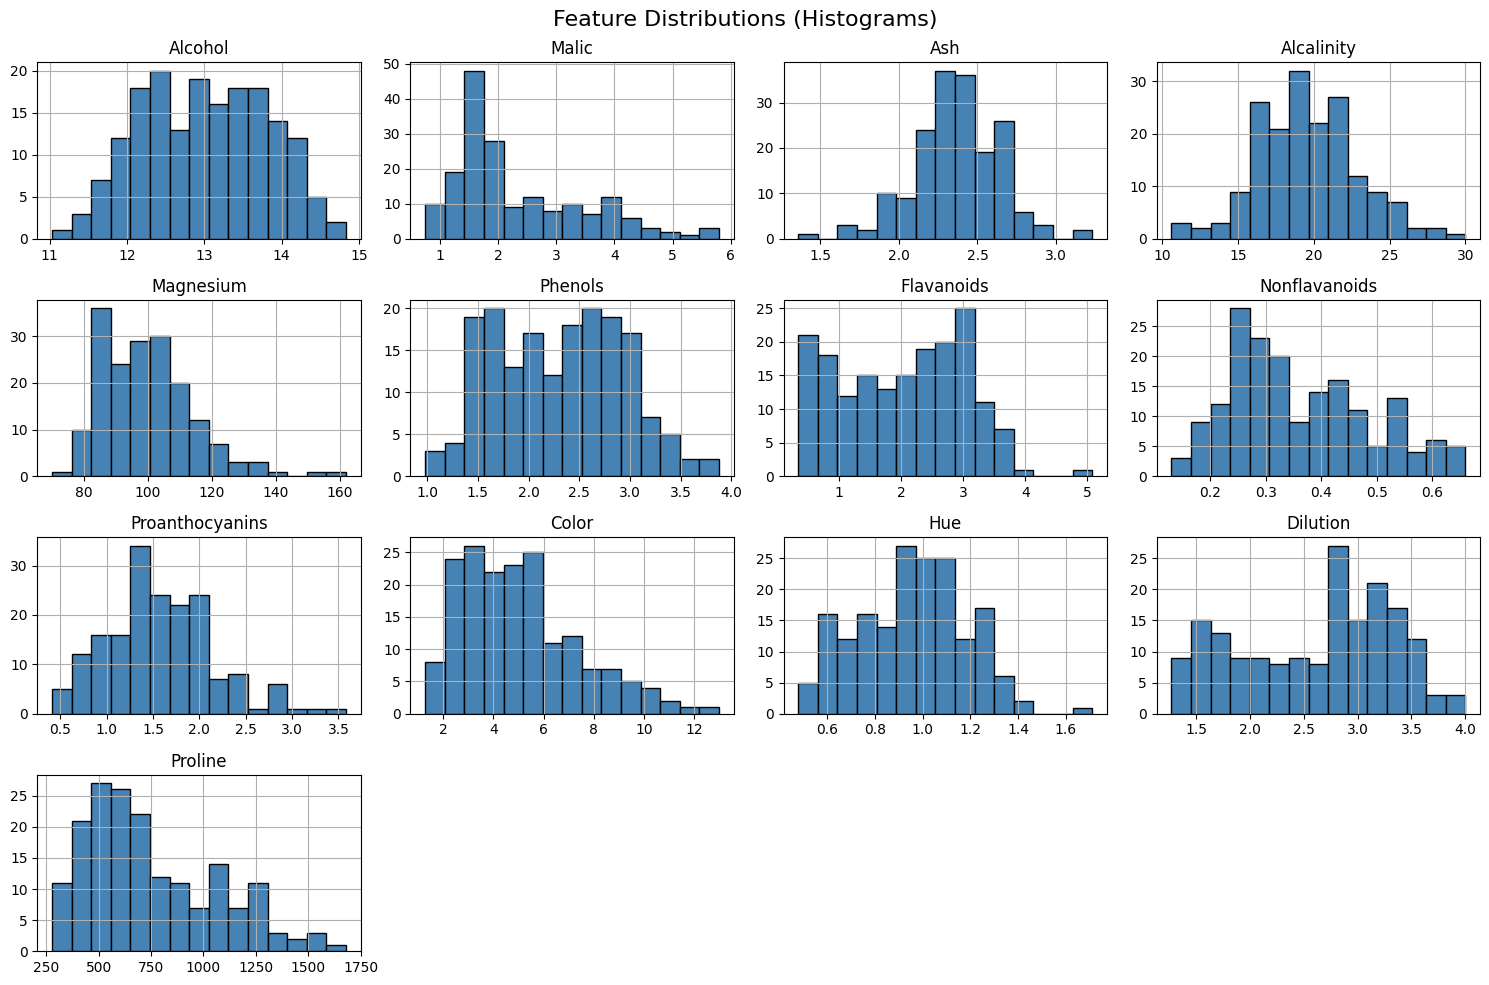

In [107]:
# Plot histograms for all numerical features (excluding 'Type')
df.drop('Type', axis=1).hist(
    bins=15,             # Number of bins in each histogram
    figsize=(15, 10),    # Width & height of the full plot
    layout=(4, 4),       # Arrange subplots in 4x4 grid
    color='steelblue',   # Histogram color
    edgecolor='black'    # Border color for each bar
)
plt.suptitle('Feature Distributions (Histograms)', fontsize=16)
plt.tight_layout()
plt.show()                   #### Skewness are present

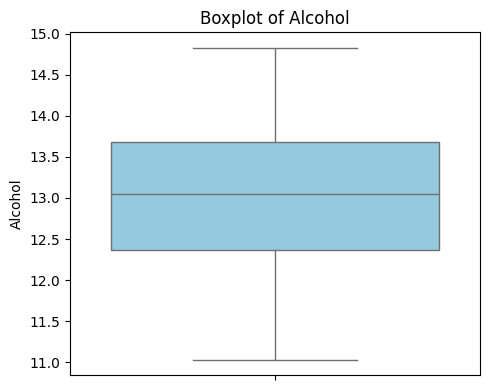

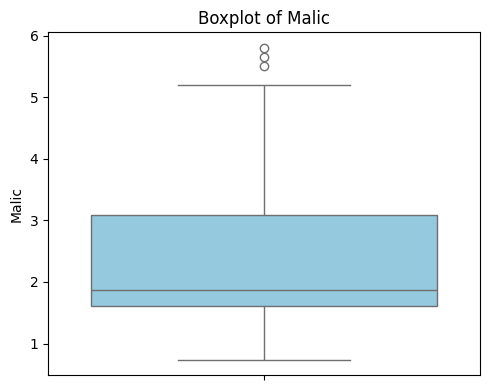

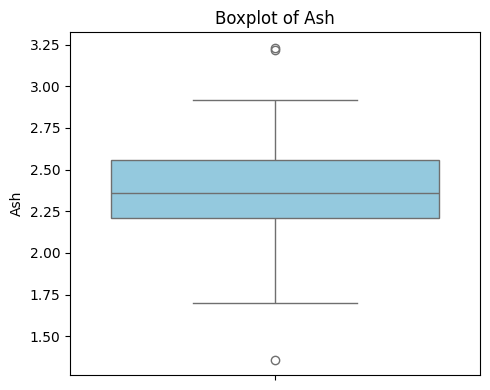

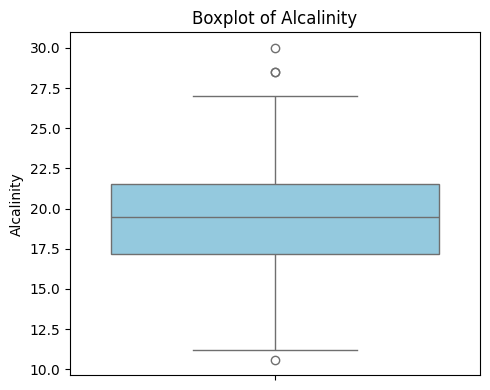

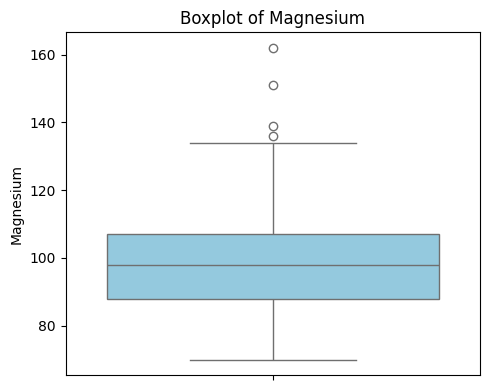

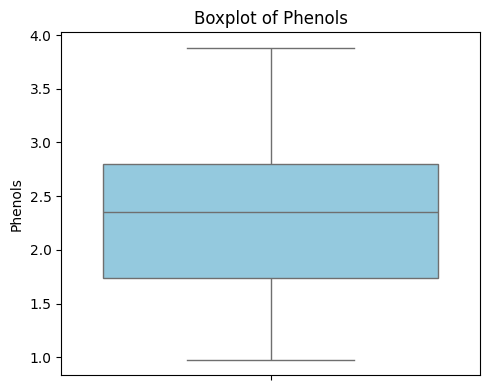

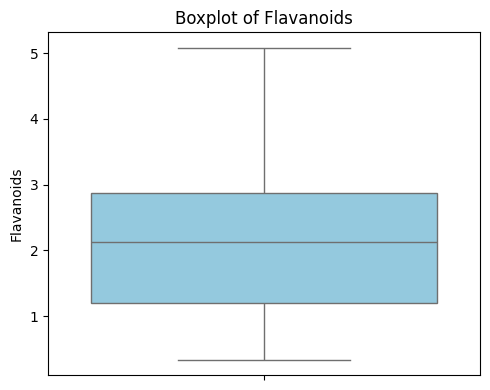

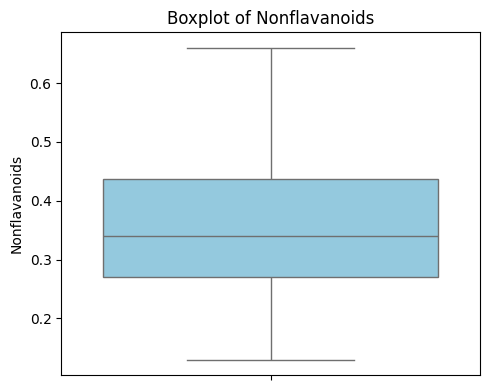

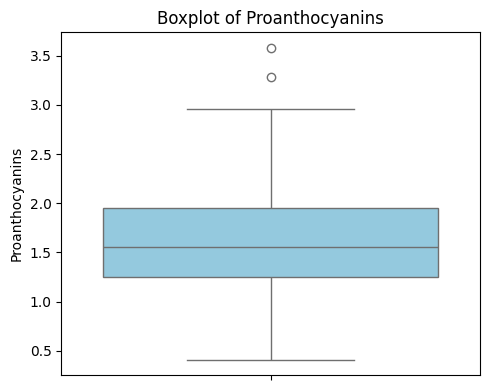

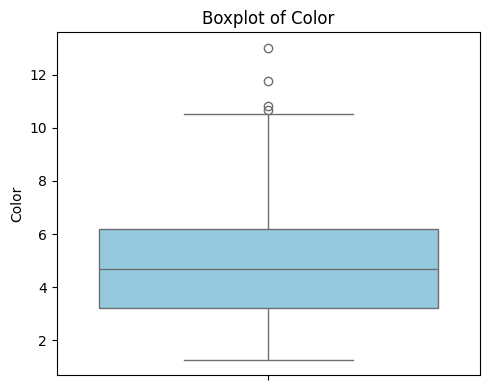

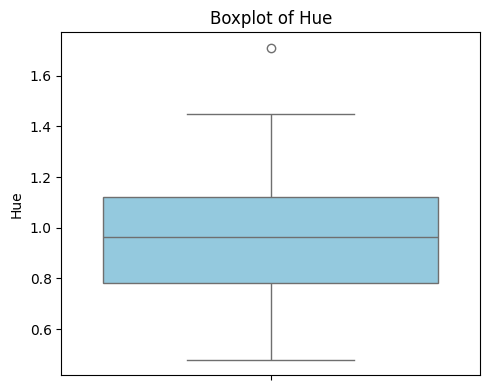

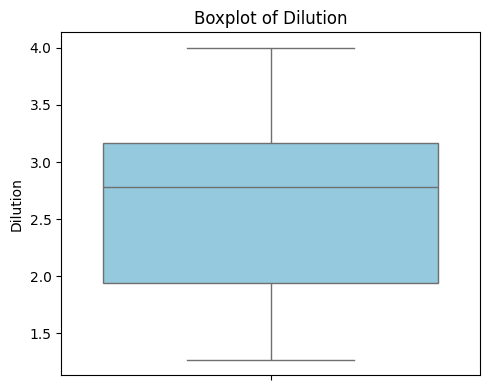

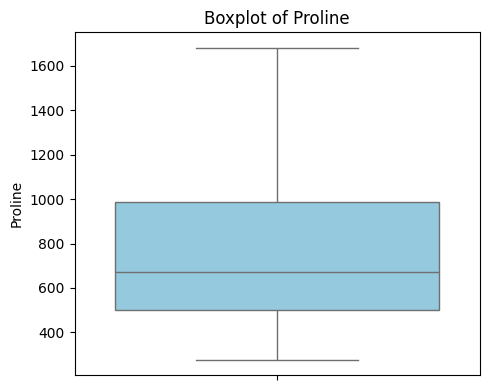

In [108]:
# Loop through all numeric features (excluding 'Type') and plot boxplots
features = df.columns[1:]  # Exclude the 'Type' column

for col in features:
    plt.figure(figsize=(5,4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
 ### shows outliers

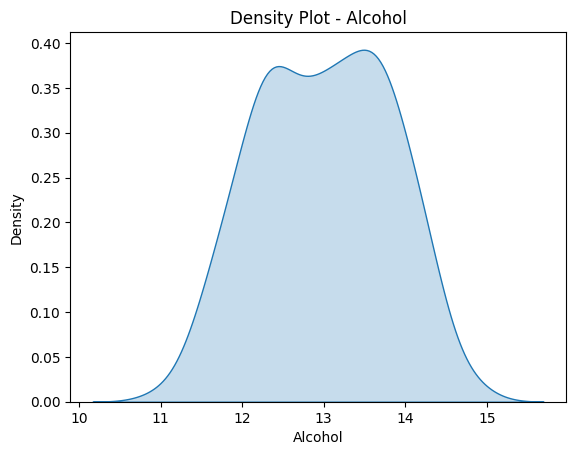

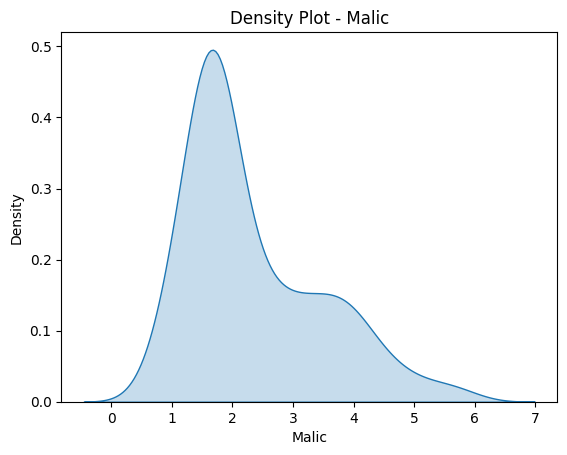

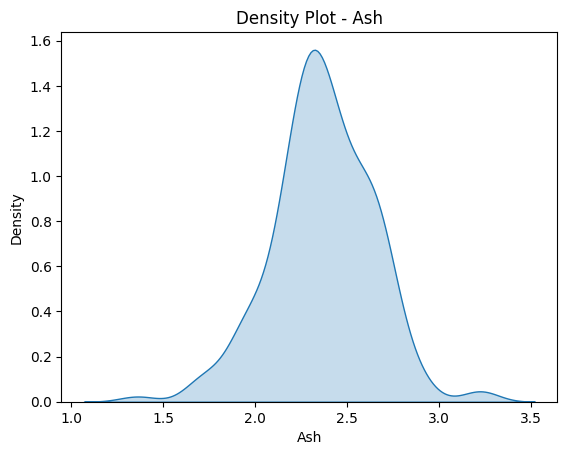

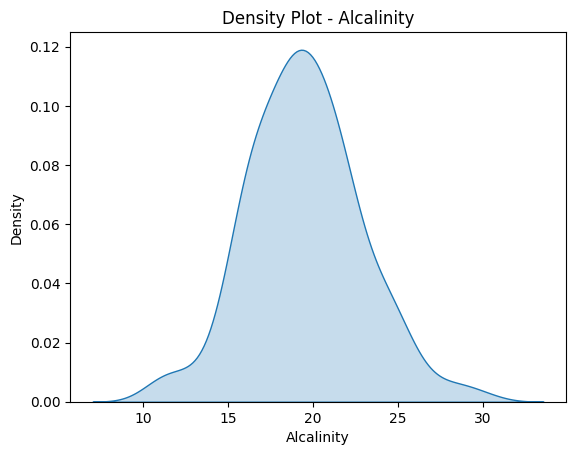

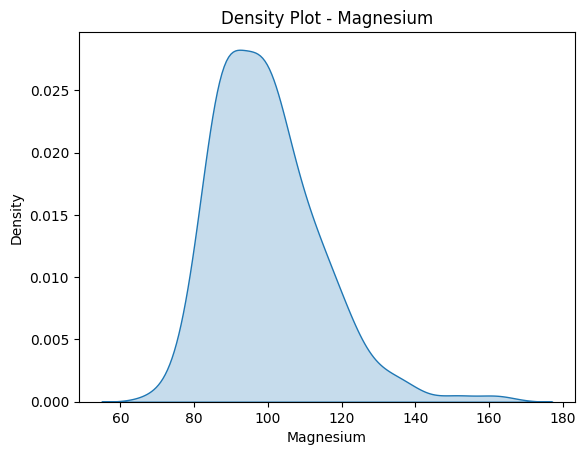

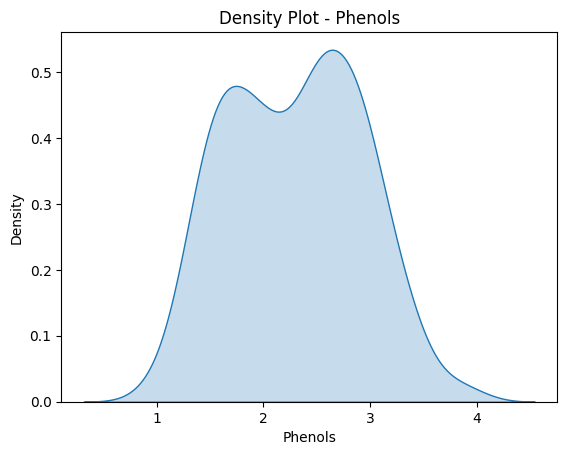

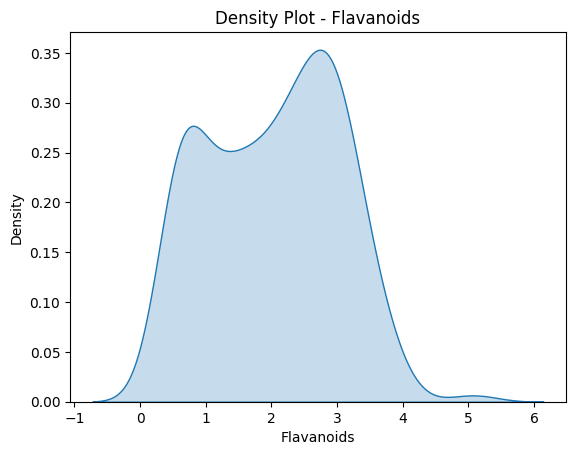

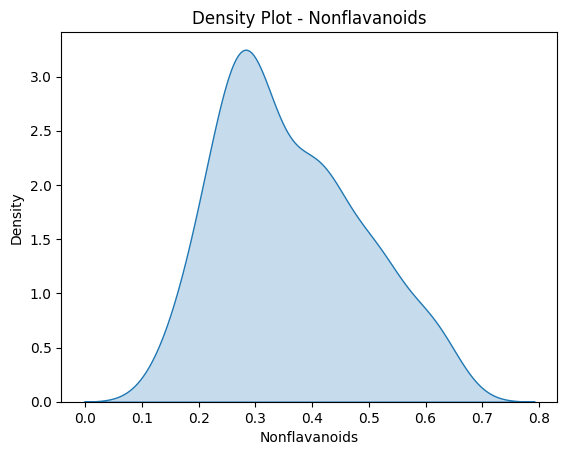

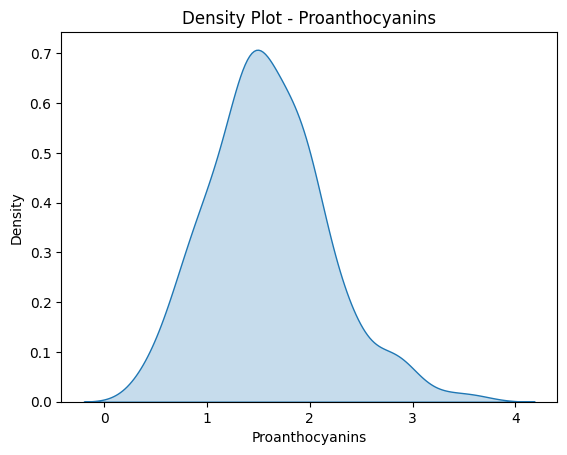

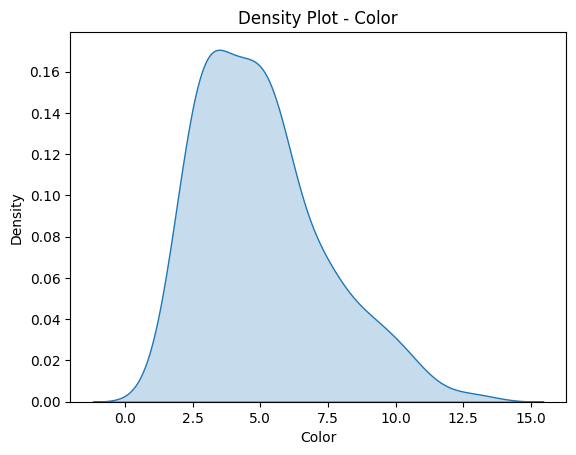

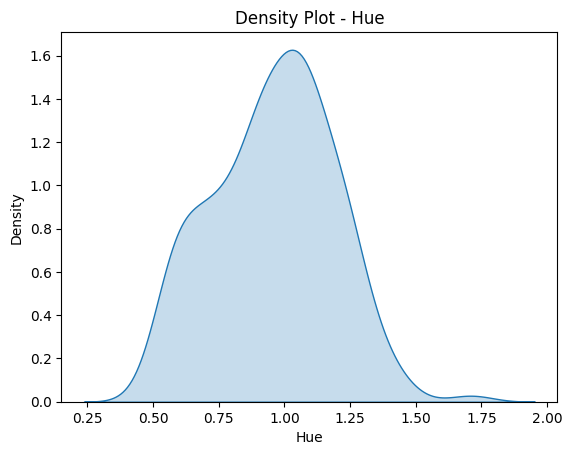

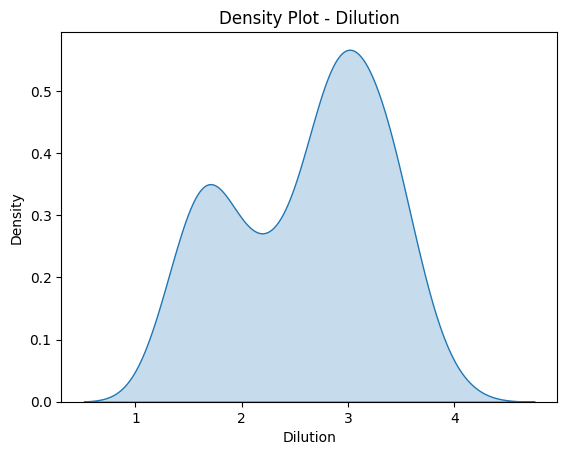

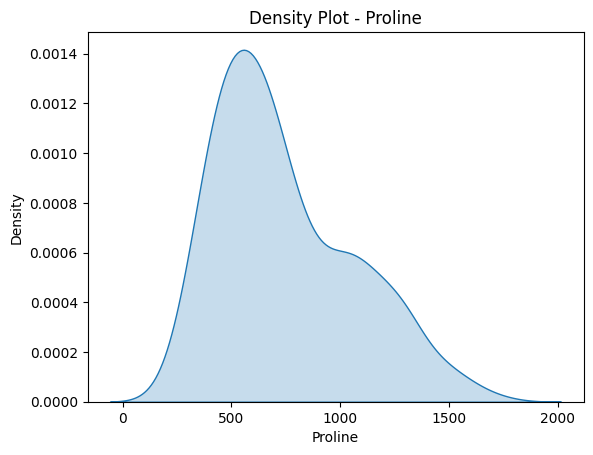

In [109]:
#visualizing using density plot
for column in df.columns[1:]:
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Density Plot - {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


In [110]:
#correlations between features
df.corr()   ## +1: Strong positive correlation (both go up)
            ## -1: Strong negative correlation (one goes up, the other goes down)
            ## 0: No correlation

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

<Axes: >

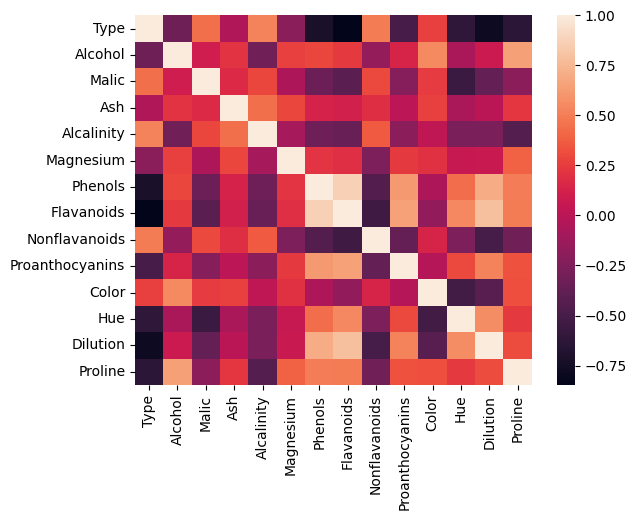

In [111]:
sns.heatmap(df.corr())  # visualizing corellation

Dimensionality Reduction with PCA:

In [112]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [113]:
# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

In [114]:
explained_variance = pca.explained_variance_ratio_

In [115]:
# in percentage - The amount of variance that each PCA explains is
explained_variance

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [116]:
#cumulative variance
var1=np.cumsum(np.round(explained_variance, decimals=4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [117]:
df_pca

array([[-3.52293390e+00,  1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00, -3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00,  1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00,  2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00,  2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00,  2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

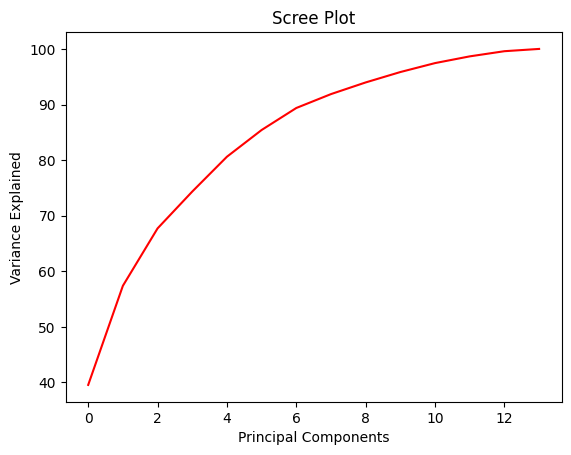

In [118]:
# Scree plot
plt.plot(var1,color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [119]:
n_components = pca.n_components_
n_components

14

In [120]:
pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(n_components)])

In [121]:
pca_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.522934  1.453098 -0.164795 -0.013273  0.737345  0.300716  0.573876   
1 -2.528858 -0.330019 -2.026707 -0.417144 -0.283214  0.884309 -0.029716   
2 -2.785029  1.036936  0.983238  0.664232 -0.387565 -0.468842  0.488305   
3 -3.922588  2.768210 -0.174968  0.565088 -0.324360 -0.262616 -0.398364   
4 -1.407511  0.867773  2.025829 -0.440906  0.227949  0.593762  0.447876   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  
0 -0.055637 -0.458765 -1.065570 -0.420494  0.552928 -0.302978  0.200857  
1 -1.010372  0.218806  0.020182 -0.130020  0.394971 -0.146645  0.126402  
2  0.268957  1.222769  0.106249 -0.279074  0.001898  0.021278 -0.055752  
3 -0.618844 -0.114658 -0.107671  0.773866 -0.230929 -0.501277  0.019903  
4 -0.434937 -0.261548 -0.112434 -0.537931 -0.226686  0.274109 -0.517498

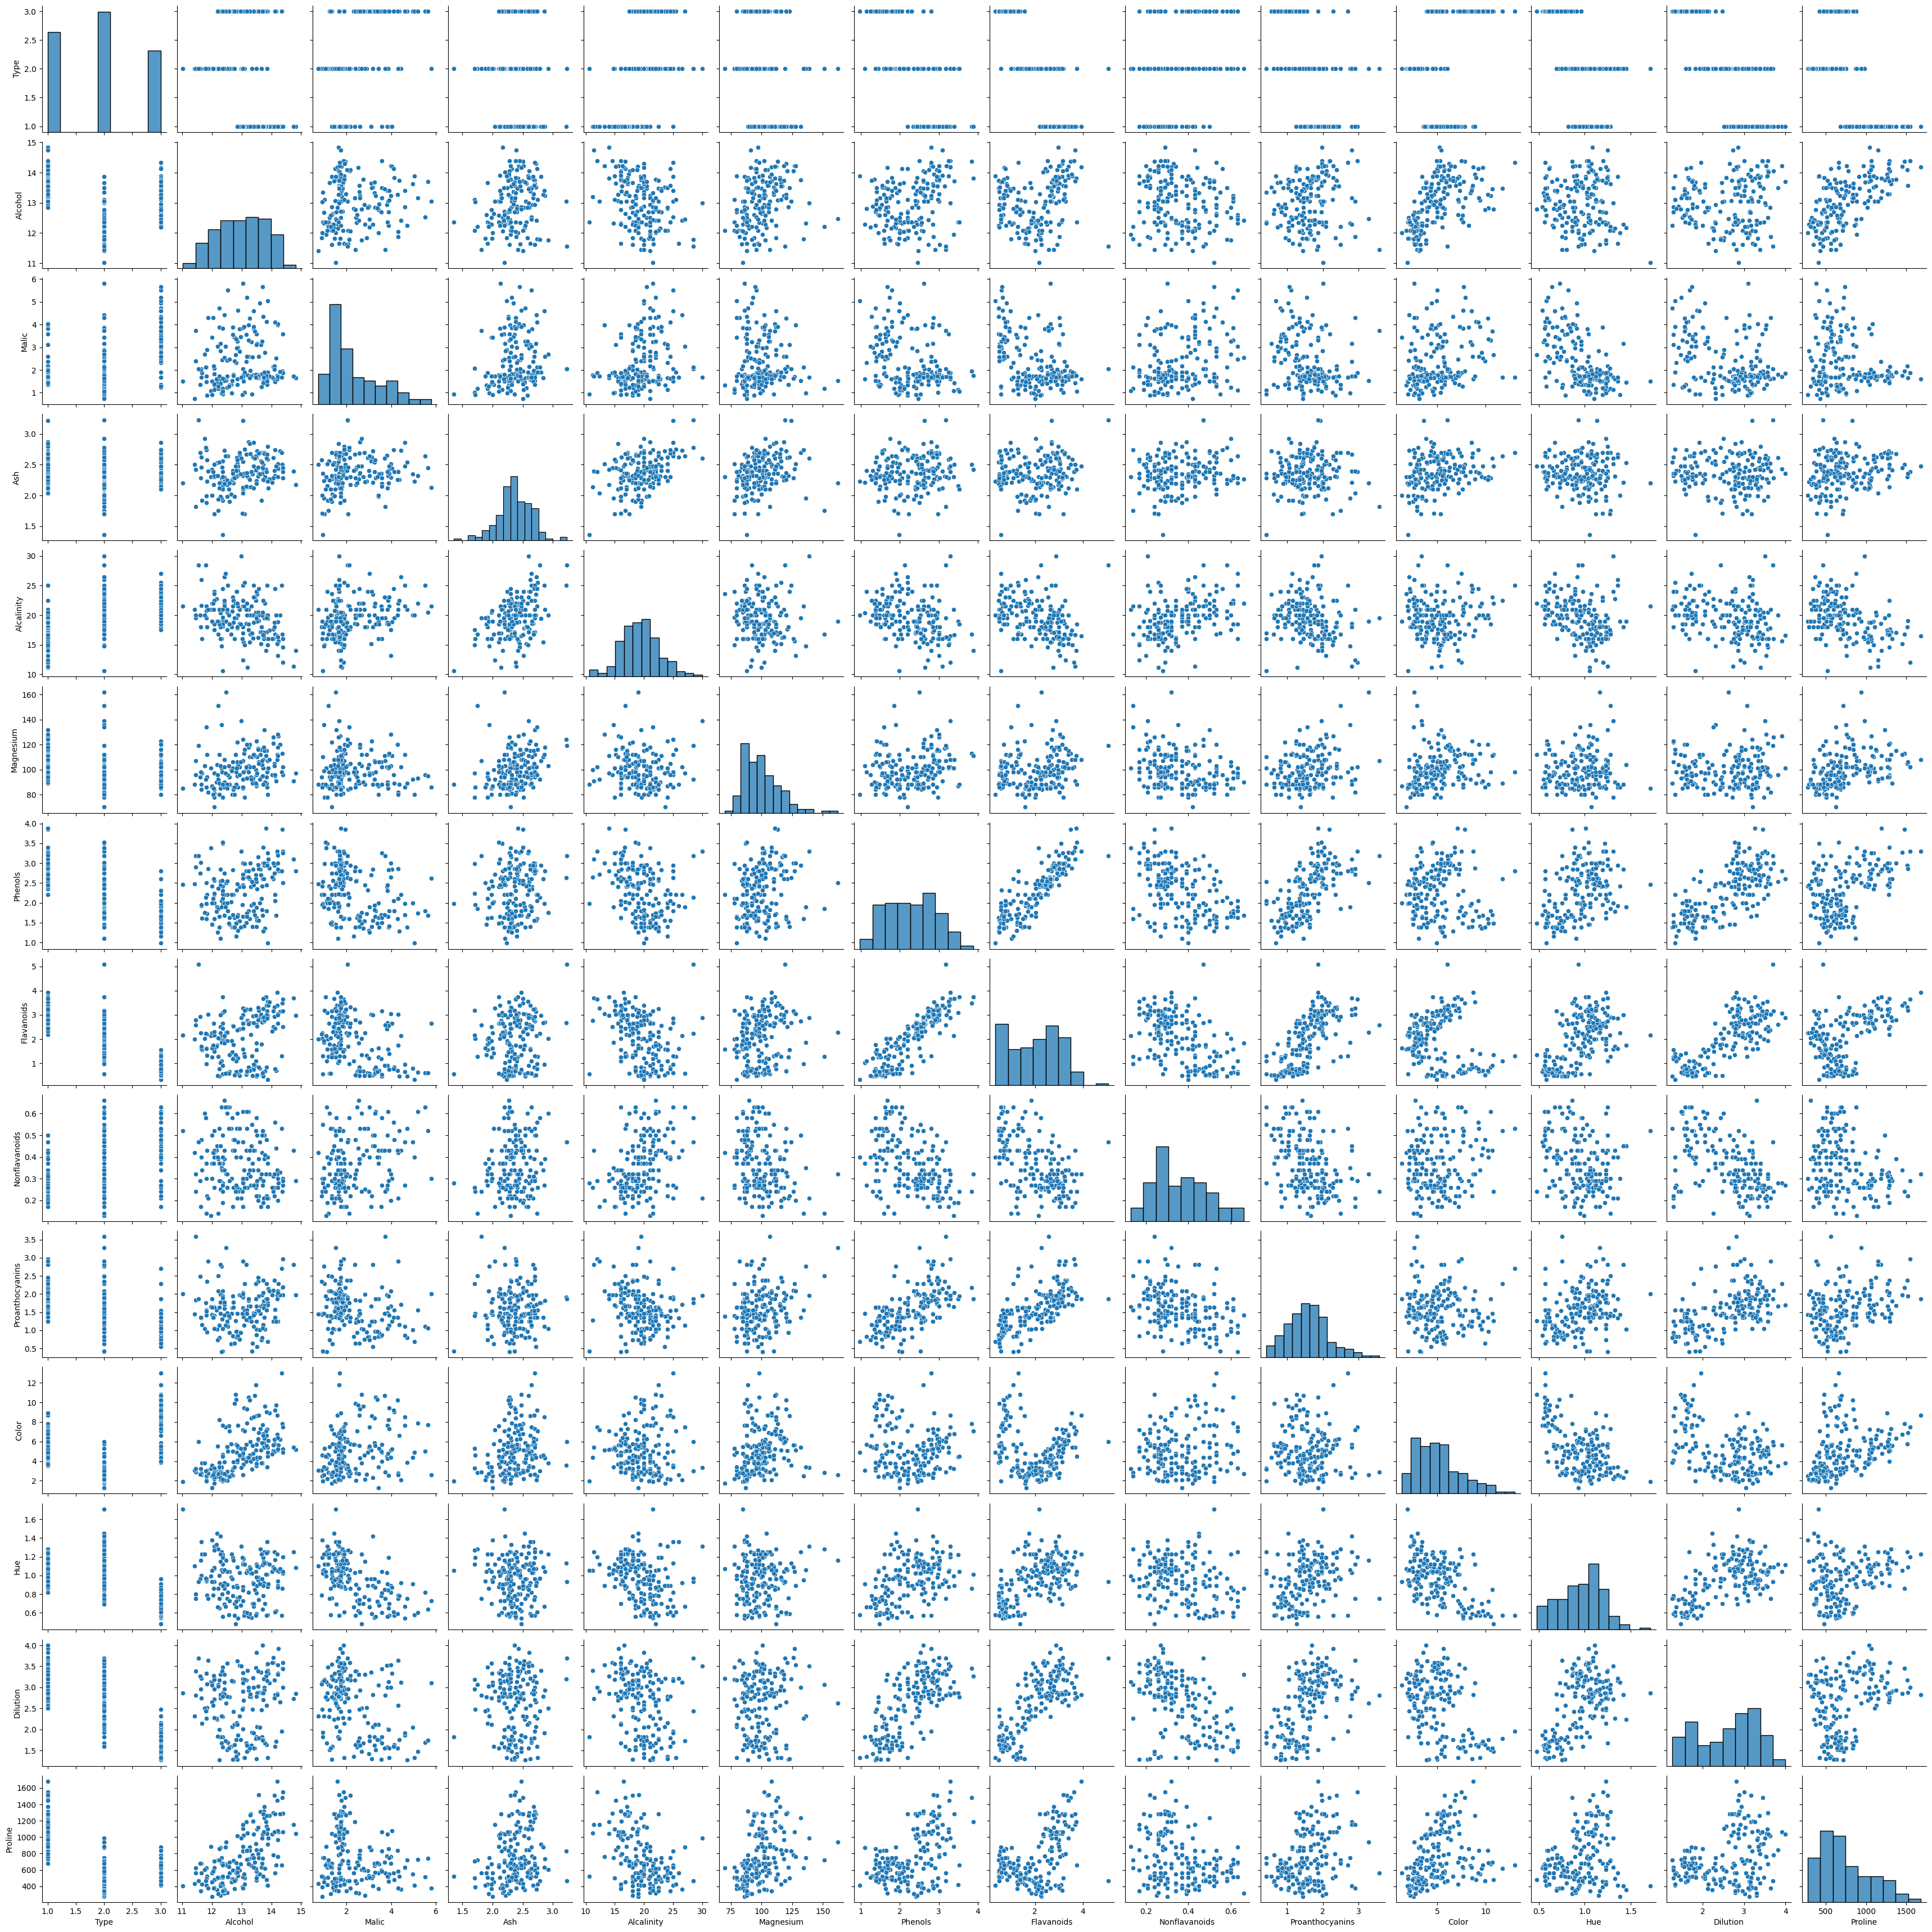

In [122]:
sns.pairplot(df)  # can check scatterplot with original dataset and see the difference

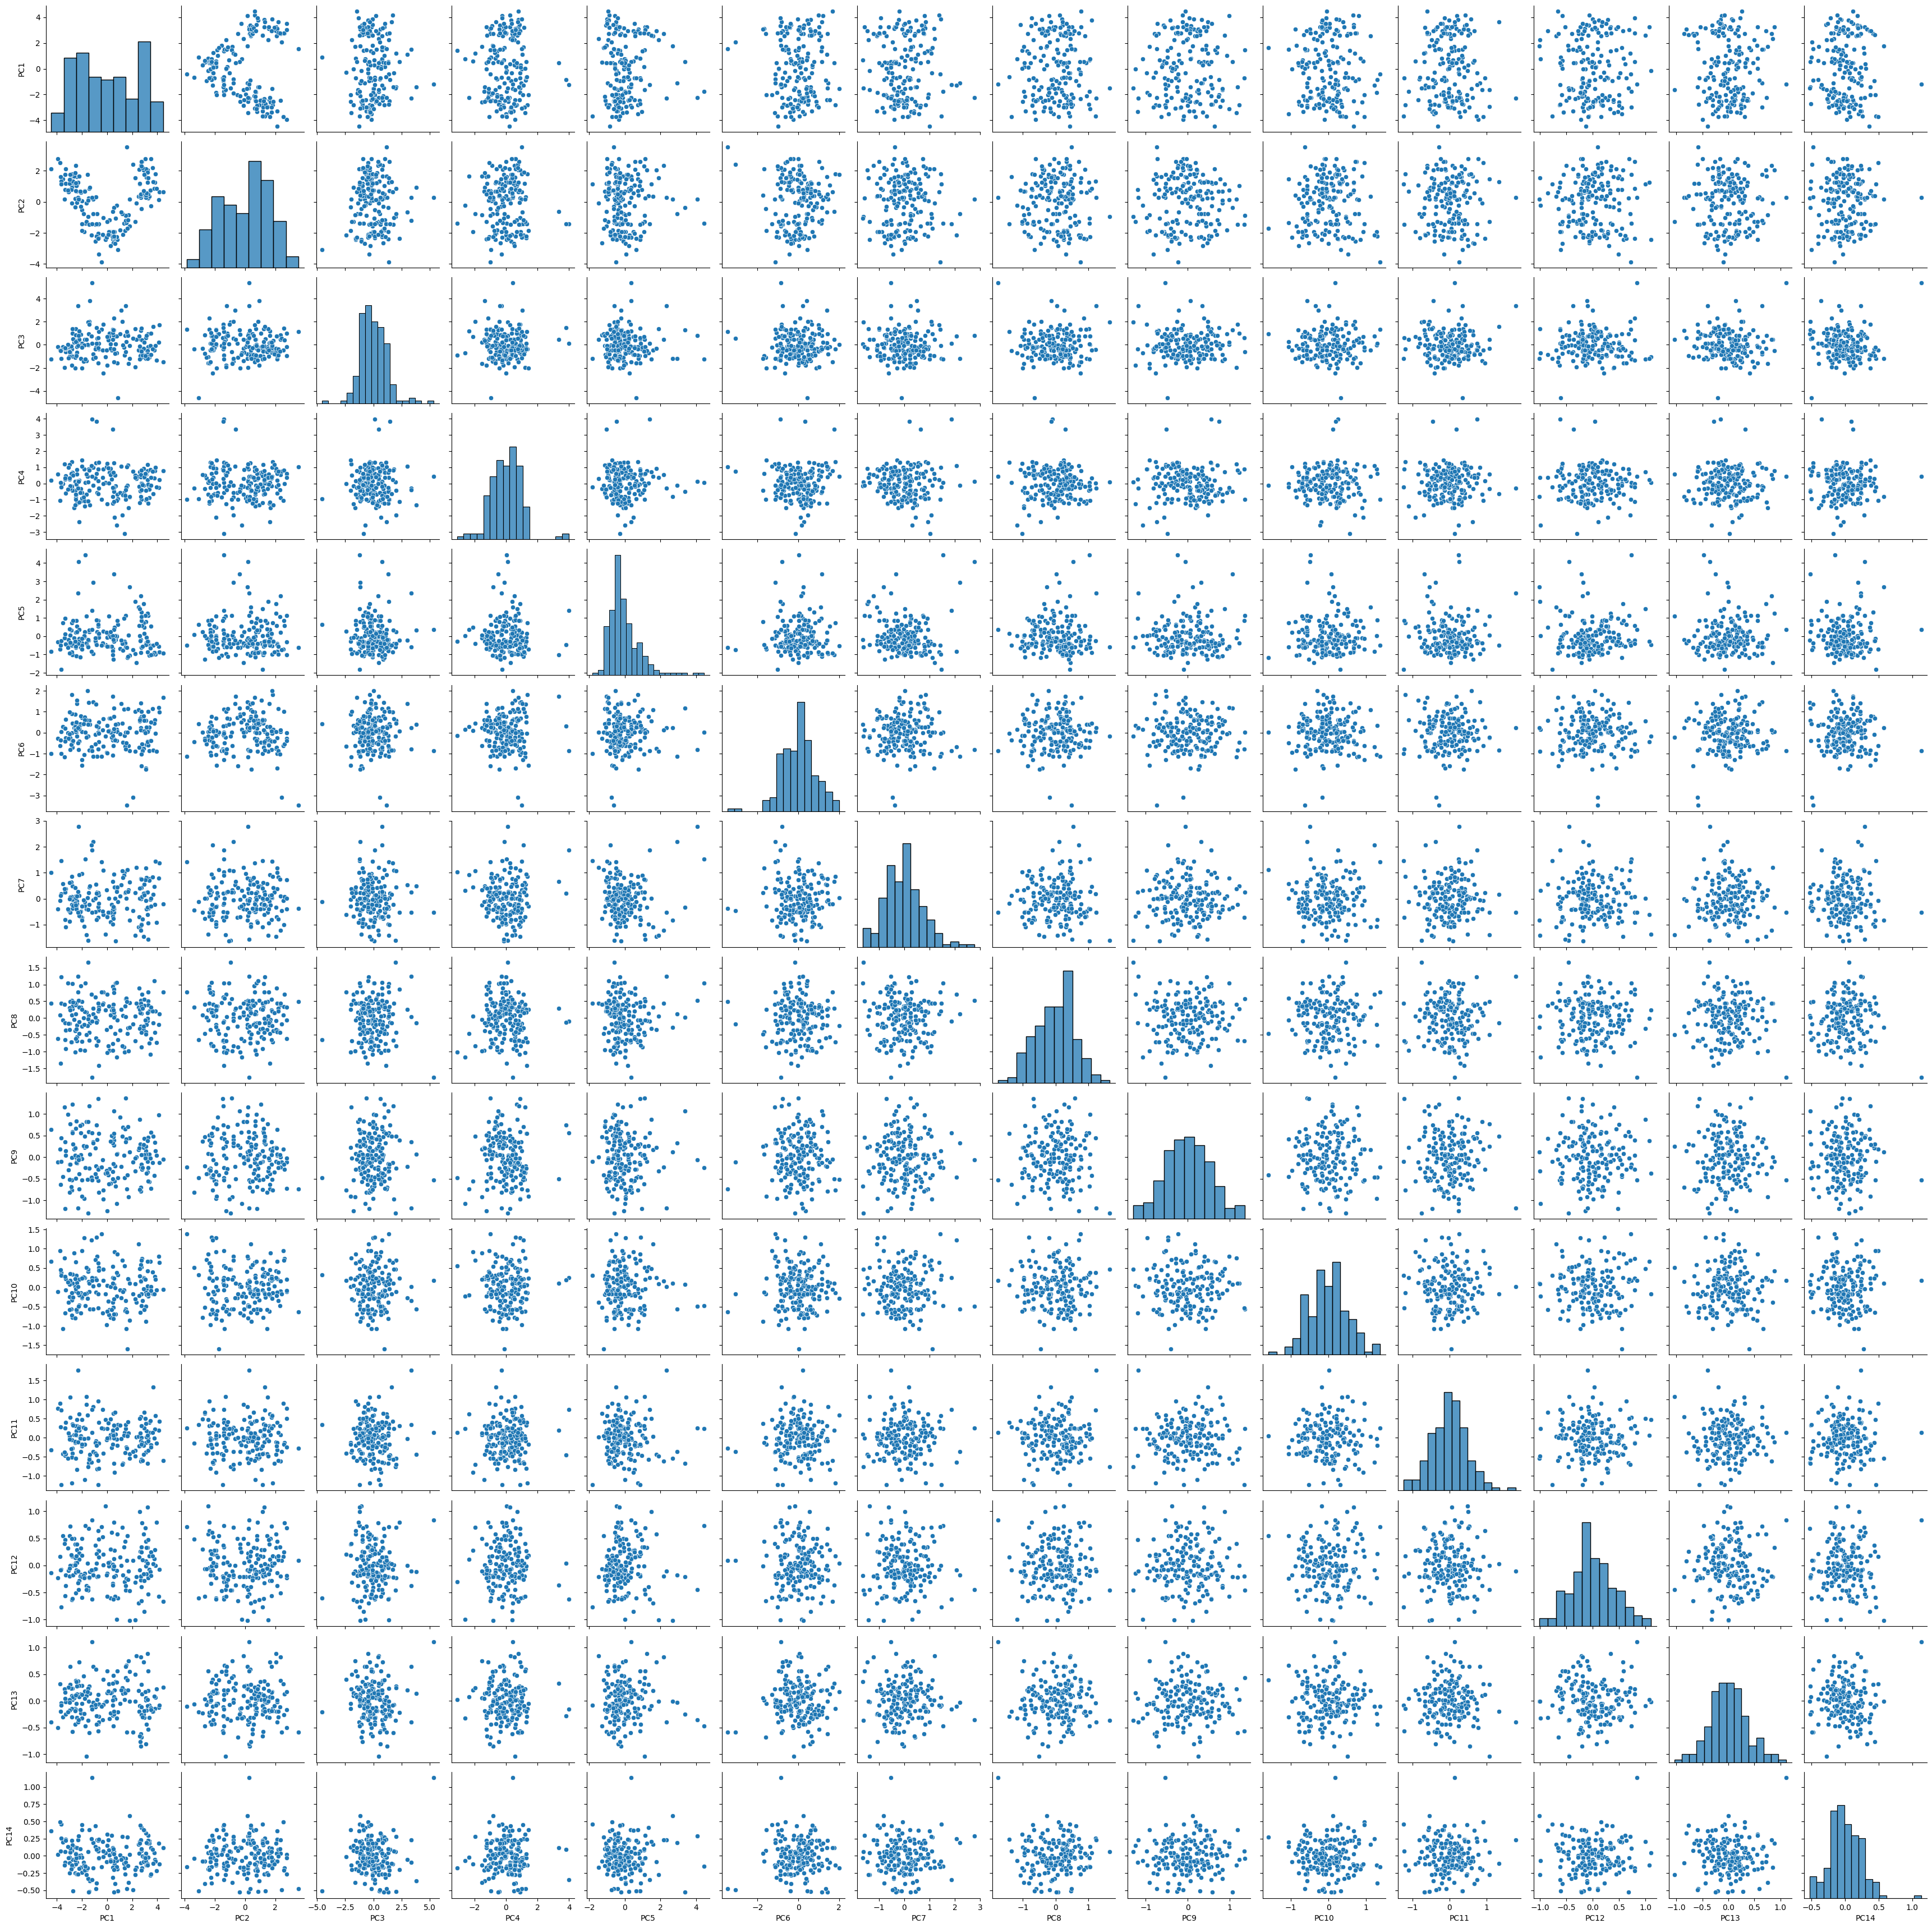

In [123]:
sns.pairplot(pca_df) # After applying PCA there should not be any correlation. Thus multicollinearity is removed or not that you can cross check.

Task 3: Clustering with Original Data:

In [124]:
from sklearn.cluster import KMeans

In [125]:
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

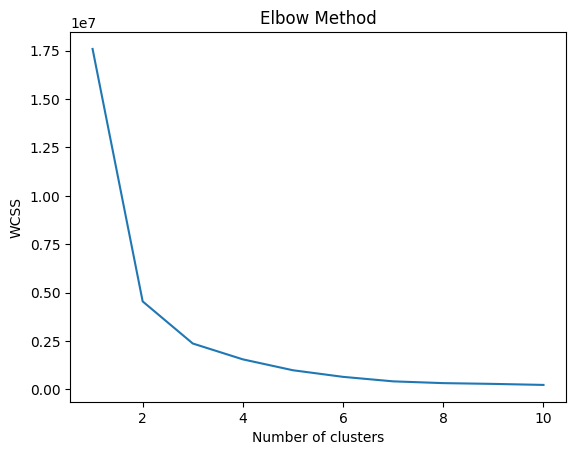

In [126]:
wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(df) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia. In WCSS list we will append all distances i.e if cluster is 10 what is the value, if 9 what is value and so on upto 1.

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [127]:
wcss

[17592402.70373318,
 4545800.927930761,
 2370742.3045900576,
 1551154.7368897693,
 988299.0792639238,
 647371.004556449,
 414796.93359603814,
 323256.5473868109,
 283817.589254854,
 230750.02141678685]

In [128]:
kmeans= KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(n_clusters=4)

In [129]:
labels=kmeans.labels_
labels

array([3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2,
       3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 3, 3, 0, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 0, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 3,
       3, 2], dtype=int32)

In [130]:
features=df[['Type','Alcohol']]

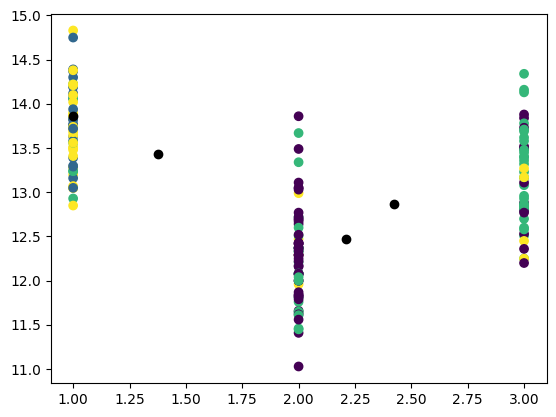

In [131]:
plt.scatter(features['Type'],features['Alcohol'],c=labels)
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],color='black')

In [132]:
#now for silhoutte score
from sklearn.metrics import silhouette_score
silhoutte_avg=silhouette_score(df,labels)
silhoutte_avg

np.float64(0.5586869071134494)

Task 4: Clustering with PCA Data:

In [133]:
scaled_df=pd.DataFrame(df_scaled,columns=df.columns) #creating data frame of scaled data and assigning original column names to it


In [134]:
scaled_df

Type   Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0   -1.213944  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1   -1.213944  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2   -1.213944  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3   -1.213944  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4   -1.213944  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   
..        ...       ...       ...       ...         ...        ...       ...   
173  1.373864  0.876275  2.974543  0.305159    0.301803  -0.332922 -0.985614   
174  1.373864  0.493343  1.412609  0.414820    1.052516   0.158572 -0.793334   
175  1.373864  0.332758  1.744744 -0.389355    0.151661   1.422412 -1.129824   
176  1.373864  0.209232  0.227694  0.012732    0.151661   1.422412 -1.033684   
177  1.373864  1.395086  1.583165  1.365208    1.502943  -0.262708 -0.392751   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034819      -0.659563         1.224884  0.251717  0.362177  1.847920   
1      0.733629      -0.820719        -0.544721 -0.293321  0.406051  1.113449   
2      1.215533      -0.498407         2.135968  0.269020  0.318304  0.788587   
3      1.466525      -0.981875         1.032155  1.186068 -0.427544  1.184071   
4      0.663351       0.226796         0.401404 -0.319276  0.362177  0.449601   
..          ...            ...              ...       ...       ...       ...   
173   -1.424900       1.274310        -0.930179  1.142811 -1.392758 -1.231206   
174   -1.284344       0.549108        -0.316950  0.969783 -1.129518 -1.485445   
175   -1.344582       0.549108        -0.422075  2.224236 -1.612125 -1.485445   
176   -1.354622       1.354888        -0.229346  1.834923 -1.568252 -1.400699   
177   -1.274305       1.596623        -0.422075  1.791666 -1.524378 -1.428948   

      Proline  
0    1.013009  
1    0.965242  
2    1.395148  
3    2.334574  
4   -0.037874  
..        ...  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160  

[178 rows x 14 columns]

In [135]:
pca_data=scaled_df.iloc[:,0:10]
pca_data

Type   Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0   -1.213944  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1   -1.213944  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2   -1.213944  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3   -1.213944  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4   -1.213944  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   
..        ...       ...       ...       ...         ...        ...       ...   
173  1.373864  0.876275  2.974543  0.305159    0.301803  -0.332922 -0.985614   
174  1.373864  0.493343  1.412609  0.414820    1.052516   0.158572 -0.793334   
175  1.373864  0.332758  1.744744 -0.389355    0.151661   1.422412 -1.129824   
176  1.373864  0.209232  0.227694  0.012732    0.151661   1.422412 -1.033684   
177  1.373864  1.395086  1.583165  1.365208    1.502943  -0.262708 -0.392751   

     Flavanoids  Nonflavanoids  Proanthocyanins  
0      1.034819      -0.659563         1.224884  
1      0.733629      -0.820719        -0.544721  
2      1.215533      -0.498407         2.135968  
3      1.466525      -0.981875         1.032155  
4      0.663351       0.226796         0.401404  
..          ...            ...              ...  
173   -1.424900       1.274310        -0.930179  
174   -1.284344       0.549108        -0.316950  
175   -1.344582       0.549108        -0.422075  
176   -1.354622       1.354888        -0.229346  
177   -1.274305       1.596623        -0.422075  

[178 rows x 10 columns]

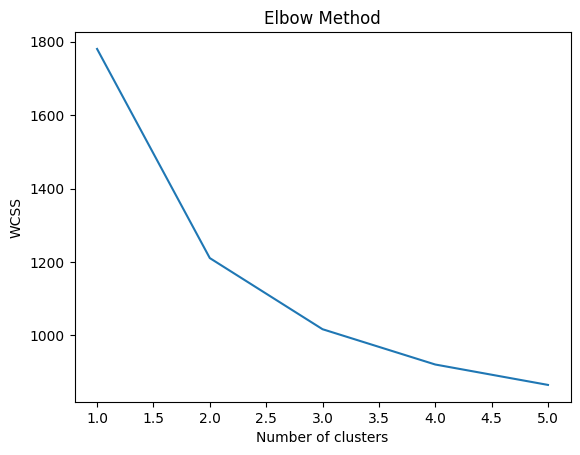

In [148]:
wcsss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1,6):
    kmeanss = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeanss.fit(pca_data) #  use fit method to fit the kmeans object to our scaled dataframe
    wcsss.append(kmeanss.inertia_)# another name for wcss is inertia. In WCSS list we will append all distances i.e if cluster is 10 what is the value, if 9 what is value and so on upto 1.

plt.plot(range(1, 6), wcsss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
kmeanss=KMeans(n_clusters=3)
kmeanss.fit(pca_data)

KMeans(n_clusters=3)

In [150]:
labelss=kmeanss.labels_
labelss

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [151]:
silhoutte_avgs=silhouette_score(pca_data,labelss)
silhoutte_avgs

np.float64(0.24435154953834132)

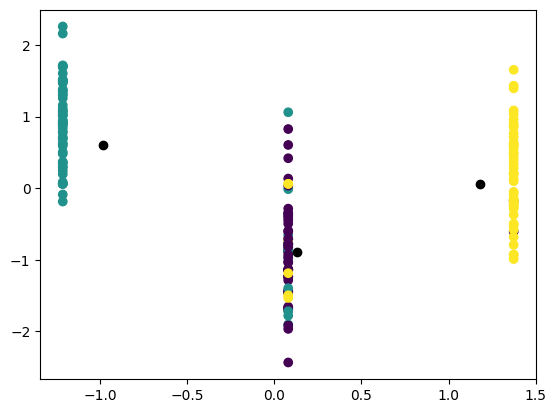

In [152]:
featuress=pca_data[['Type','Alcohol']]


plt.scatter(featuress['Type'],featuress['Alcohol'],c=labelss)
centroidss=kmeanss.cluster_centers_
plt.scatter(centroidss[:,0],centroidss[:,1],color='black')

Cluserting on original data frame was high because of unscaled data which created biases After standarization we observed all columns having mean of 0 and standard deviation 1 We got silhoutte score of 0.54 and 0.25

In this assignment we got to learn about the important features to consider by gaining maximum accuracy PCA helps in reducing unnecessary columns and making it easier to understand the data PCA to consider when we have large no columns with less information We should consider PCA to reduce dimentionality among the data

Dimensionality reduction with PCA can enhance clustering performance by:

Removing noise,

Simplifying the structure,

Speeding up computation.

However, it comes with the trade-off of interpretability and possible loss of finer-grained cluster distinctions.

✅ Summary:


PCA offers efficiency and clarity, especially in visualization.

Clustering on original data may retain higher fidelity but is more complex.

Using PCA + Clustering is often a balanced approach: fast, clean, and effective.

Practical Implications

PCA:

Reduces data dimensionality, removes noise, and helps visualize complex data. Useful for simplifying data and extracting important features but can be hard to interpret.

Clustering:

Groups data into meaningful clusters to discover patterns, segment data, or detect outliers. Depends on choosing the right algorithm and parameters, and may struggle with very high-dimensional data.

Recommendations

Use PCA when you need to reduce features or visualize high-dimensional data.

Use Clustering when you want to find natural groups or segments in your data.

Often, combine both: use PCA first to reduce dimensionality, then apply clustering for better results.

In [ ]:
## Done